
<br><br>

***

<br><br>


<center><font size="7" color="purple">Chapter 3 Chart Types</font></center>

<br><br>

Just one simple example of each.

***
<br><br><br><br>

<pre>
    1)  bar charts
    2)  histograms
    3)  polar charts
    4)  scatterplots
    5)  3D
    6)  Grid of plots
    7)  Stacked plot
 
</pre>

<br><br><br><br>

For more types check out C:\Users\arono\source\python\Plots\cookbook\9781789135718_Code\Chapter02

In [1]:

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import datetime as dt 

<center><strong>Histograms</strong></center>
<br><br>
Note plt.hist(y,25) is the same as plt.hist(y,bins=25)
<br>

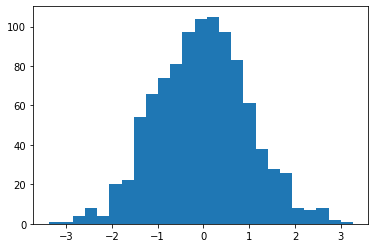

In [2]:
y = np.random.randn(1000)

plt.hist(y)
plt.savefig('7900_03_07.png')

plt.clf()
plt.hist(y, bins=25)
plt.show()

<center><strong>Bar Charts</strong></center>
<br><br>
Bar charts represent values, whereas histograms represent frequencies.
<br>
Here we are forcing values. X=1,2,3 and Y=3,2,5
<br>

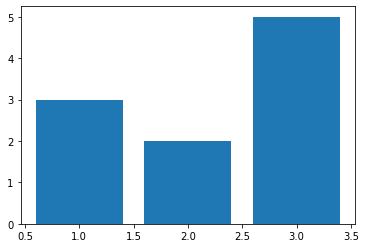

In [3]:
plt.bar([1,2,3], [3,2,5])
plt.show()

<center><strong>Scatter Plot</strong></center>
<br><br>
Both x and y are normally distributed ( -4 to 4 )
<br>
The color array is uniformally between 0 and 1
<br>
Note the no display option supresses warning but it actually supresses print statements as well
<br>

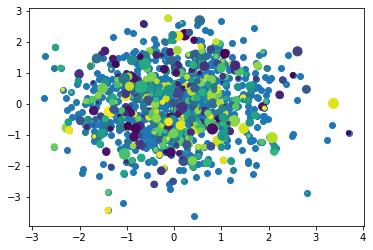

In [4]:
%%capture --no-display          

x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x, y)
plt.savefig('7900_03_17.png')
size = 50*np.random.randn(1000)
colors = np.random.rand(1000)
plt.scatter(x,y, s=size, c=colors)
plt.show()

<center><strong>Polar Charts</strong></center>
<br><br>
A Polar or Radar chart is when the x axis is wrapped around the perimeter.
<br>
Usually is a function of angles and distance.
<br>

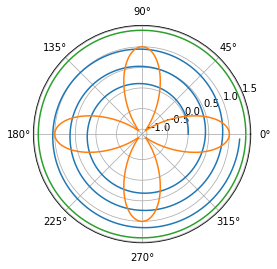

In [5]:
# the np.arange is from 0 to 2, 180 results
theta = np.arange(0., 2., 1./180.)*np.pi
# theta is from 0 to 6.28

plt.polar(3*theta, theta/5);        # spiral
plt.polar(theta, np.cos(4*theta));    # clover
plt.polar(theta, [1.4]*len(theta));      # circle (constant distance)

plt.show()

3 Dimensions

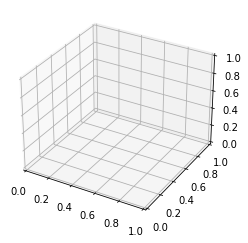

In [6]:

fig = plt.figure()
ax = plt.axes(projection='3d')
            

Grid of plots

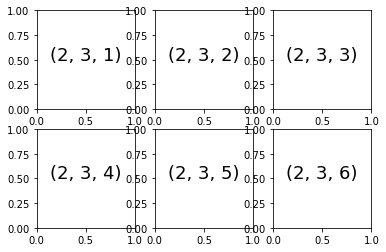

In [7]:


for i in range(1, 7):
           plt.subplot(2, 3, i)
           plt.text(0.5, 0.5, str((2, 3, i)),
                    fontsize=18, ha='center')       
       

Multiple but not a grid.

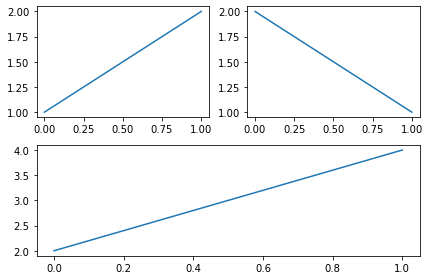

In [10]:
fig = plt.figure()

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(212)

ax1.plot([1,2])
ax2.plot([2,1])
ax3.plot([2,4])

plt.tight_layout()
plt.show();

Stacked Plot

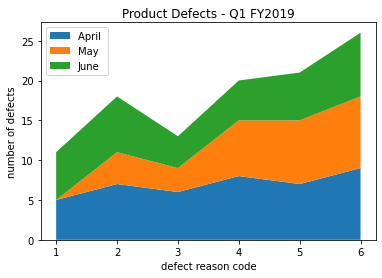

In [8]:


x = np.array([1, 2, 3, 4, 5, 6], dtype=np.int32)
Apr = [5, 7, 6, 8, 7, 9]
May = [0, 4, 3, 7, 8, 9]
June = [6, 7, 4, 5, 6, 8]

labels = ["April ", "May", "June"]

fig, ax = plt.subplots()
ax.stackplot(x, Apr, May, June, labels=labels)
ax.legend(loc=2)

plt.xlabel('defect reason code')
plt.ylabel('number of defects')
plt.title('Product Defects - Q1 FY2019')

plt.show();

Table chart

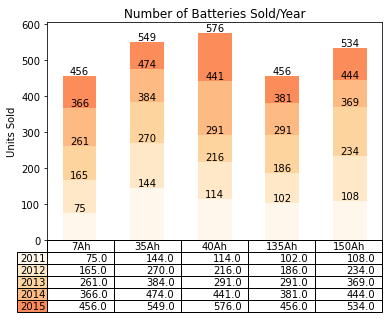

In [9]:
# Represent years in rows in the table
rows = ['2011', '2012', '2013', '2014', '2015']
# Represent battery rating in columns of the table
columns = ('7Ah', '35Ah', '40Ah', '135Ah', '150Ah')

# Number of units sold each year, each rating. e.g. 75 units of 7Ah batteris sold in 2011
data = [[75, 144, 114, 102, 108],
        [90, 126, 102,  84, 126],
        [96, 114,  75, 105, 135],
        [105, 90, 150,  90,  75],
        [90,  75, 135,  75,  90]]

# Define the range and scale for y-axis
values = np.arange(0, 600, 100)

# Specify the color map to be used
colors = plt.cm.OrRd(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)
index = np.arange(len(columns)) + 0.3
bar_width = 0.5

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
fig, ax = plt.subplots()

# Plot bars and create text labels for the table
cell_text = []

for row in range(n_rows):
    plot = plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x) for x in y_offset])
    i=0
    for rect in plot:
        ax.text(rect.get_x() + rect.get_width()/2, y_offset[i],'%d' % int(y_offset[i]), 
                ha='center', va='bottom')
        i = i+1   

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

plt.ylabel("Units Sold")
plt.title('Number of Batteries Sold/Year')

# No ticks on X-axis, as table below will cover the labels
plt.xticks([])

plt.show()